## Setup do projeto

In [1]:
import joblib
import os
import urllib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
WINE_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/'
WINE_URL = WINE_ROOT+'wine.data'

DATA_PATH = os.path.join('..', 'data', 'raw')
DATA_FILE = 'wine.csv'

WINE_DATA = os.path.join(DATA_PATH, DATA_FILE)

DEPLOY_PATH = os.path.join('..', 'model')
DEPLOY_FILE = 'finalized.sav'

## Recuperação de dados

In [3]:
def download_data(data_url=WINE_URL, data_path=DATA_PATH, data_file=DATA_FILE):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(data_url, local_path)
download_data(WINE_URL, DATA_PATH, DATA_FILE)

In [4]:
def load_data(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    names = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
	'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
    return pd.read_csv(local_path, header=None, names=names)
wine_data = load_data(DATA_PATH, DATA_FILE)
wine_data

class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

In [5]:
wine_data['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

## Correlação e distribuição

In [6]:
x = wine_data[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
	'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']]
y = wine_data['class']

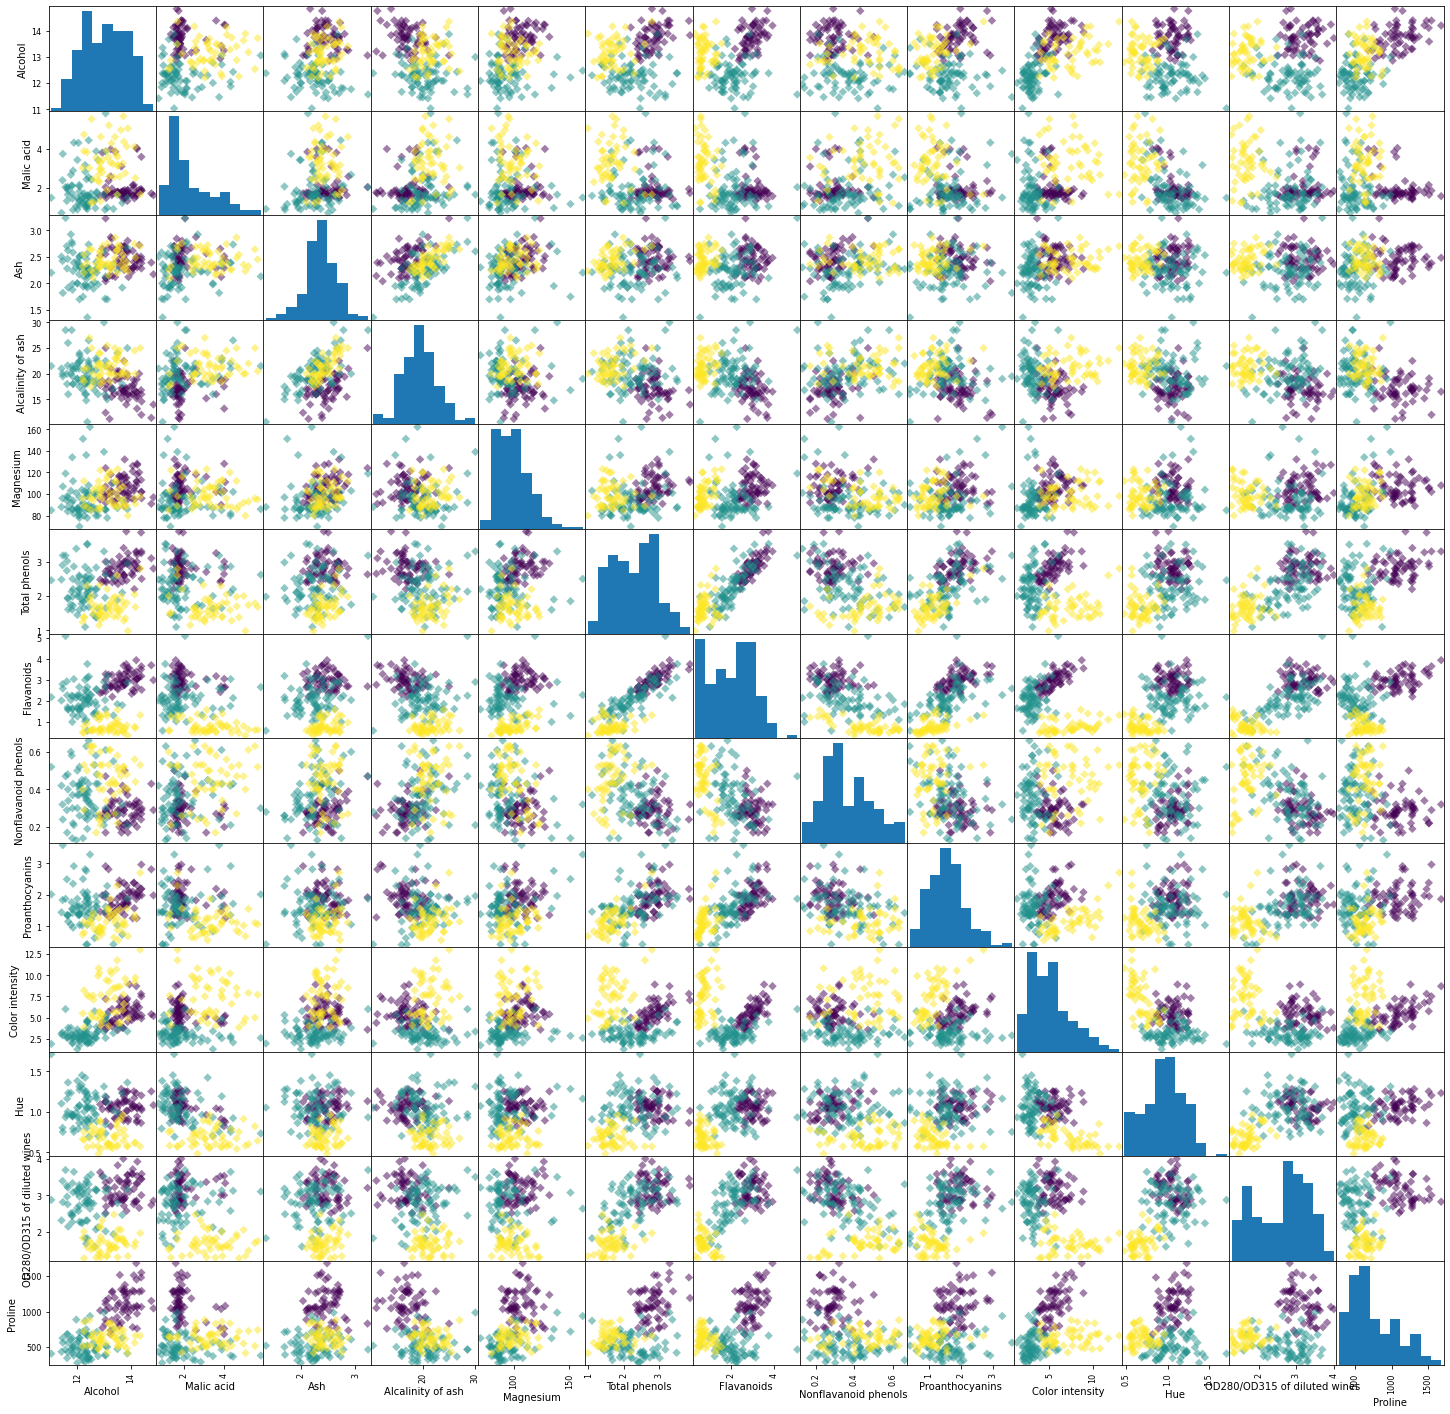

In [7]:
cores = y.astype('category').cat.codes
_ = pd.plotting.scatter_matrix(x, c=cores, figsize=[25,25], marker='D')

# Treinamento do modelo

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=42)

In [9]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

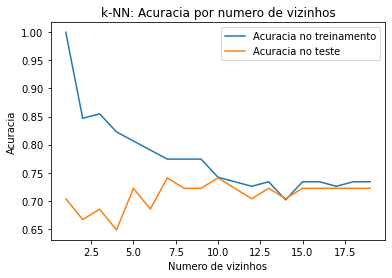

In [10]:
plt.title('k-NN: Acuracia por numero de vizinhos')
plt.plot(neighbors, train_accuracy, label='Acuracia no treinamento')
plt.plot(neighbors, test_accuracy, label='Acuracia no teste')
plt.legend()
plt.xlabel('Numero de vizinhos')
plt.ylabel('Acuracia')
plt.show()

In [11]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
predicoes = model.predict(x_test)
print('Predicoes: {}'.format(predicoes))

Predicoes: [1 2 1 1 1 1 2 2 2 3 2 3 2 2 1 3 2 1 1 3 2 1 3 2 3 3 1 3 1 3 3 2 3 2 3 3 2
 3 3 3 2 1 1 1 1 2 2 1 3 1 2 2 3 1]


In [13]:
acuracia = model.score(x_test, y_test)
print('Acuracia do modelo: {}'.format(acuracia))

Acuracia do modelo: 0.7222222222222222


# Deploy do modelo

In [14]:
local_path = os.path.join(DEPLOY_PATH, DEPLOY_FILE)
joblib.dump(model, local_path)

['../model/finalized.sav']